In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo = pd.read_csv('/content/Zoo.csv')

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [29]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [31]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
#check if there are duplicates in animal_name
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [8]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# observation: find that one frog is venomous and another one is not
# change the venomous one into frog2 to seperate 2 kinds of frog
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

In [10]:
zoo['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [11]:
zoo.head(27)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [12]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

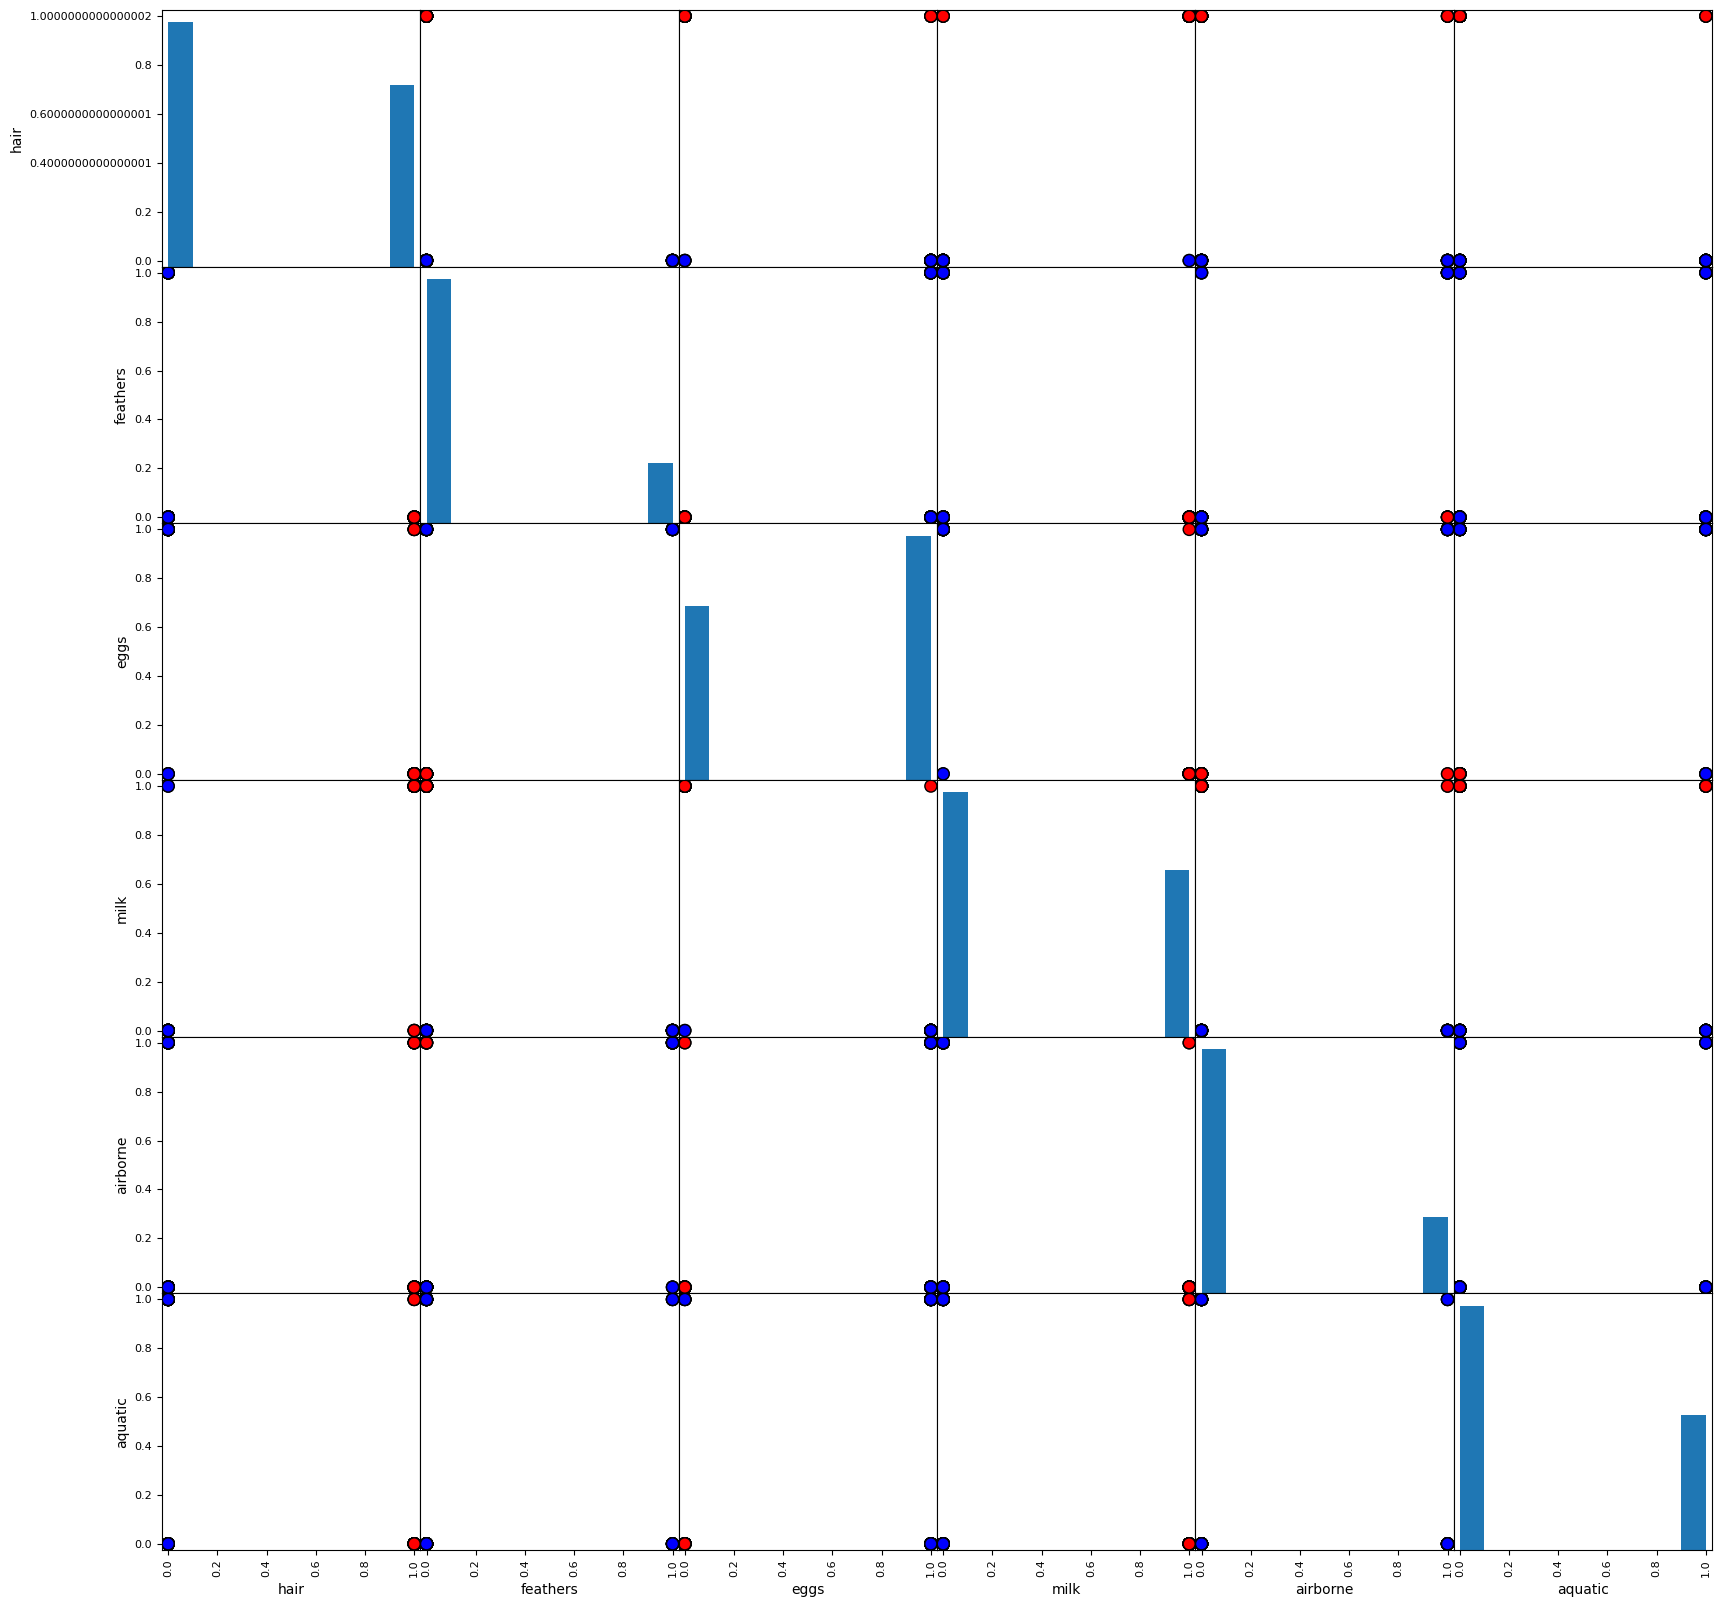

In [13]:
# scatter matrix to observe relationship between every colomn attribute.
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

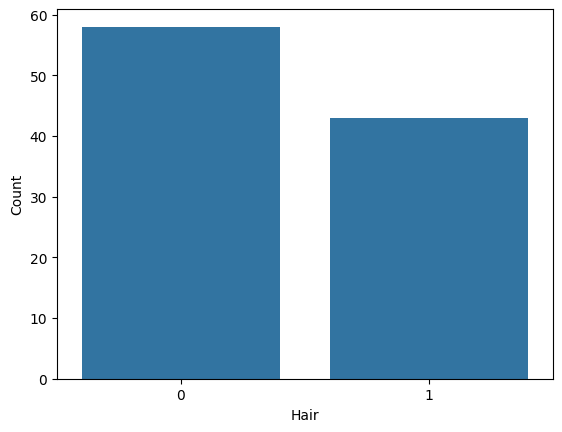

0    58
1    43
Name: hair, dtype: int64

In [14]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


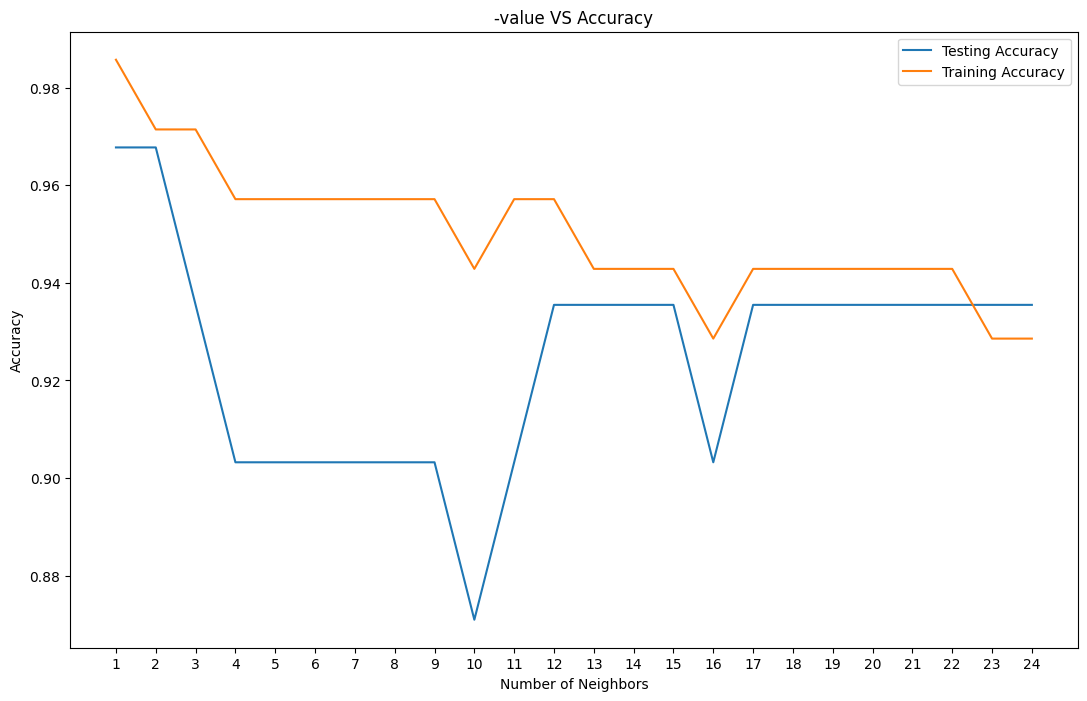

Best accuracy is 0.967741935483871 with K = 1


In [38]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

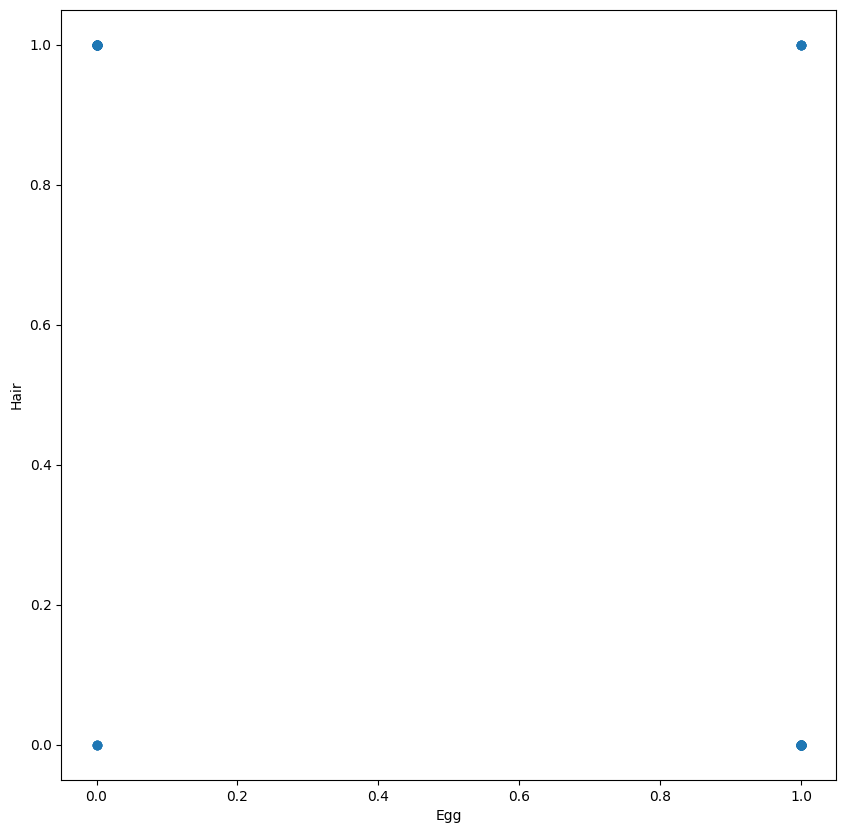

In [39]:
x = np.array(zoo.loc[:,"eggs"]).reshape(-1,1)
y = np.array(zoo.loc[:,'hair']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Hair')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != 'hair'], zoo.loc[:,'hair']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=1) accuracy is:  0.967741935483871


[]

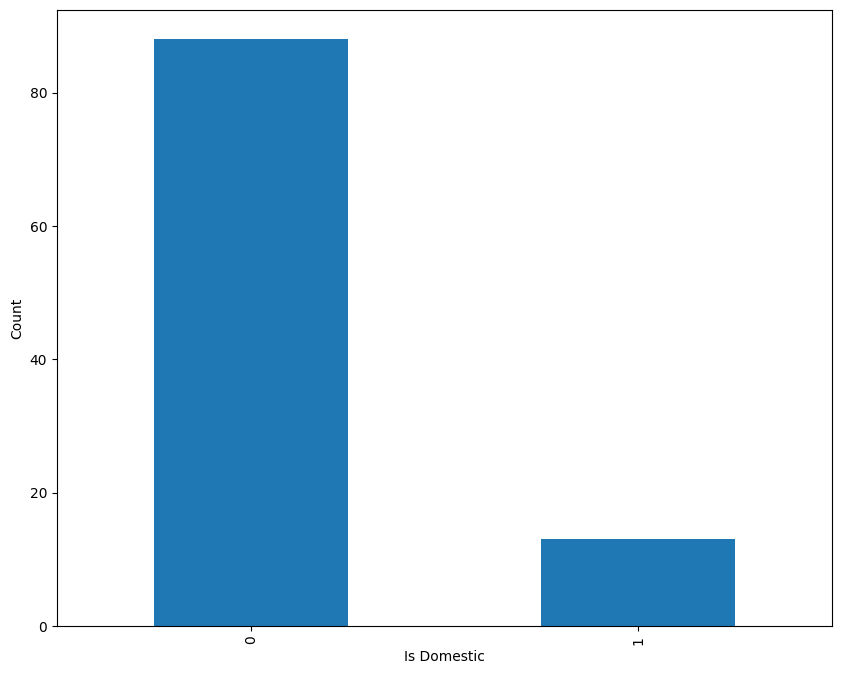

In [15]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [16]:
# So we can see mostly animals are not domestic.

In [17]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


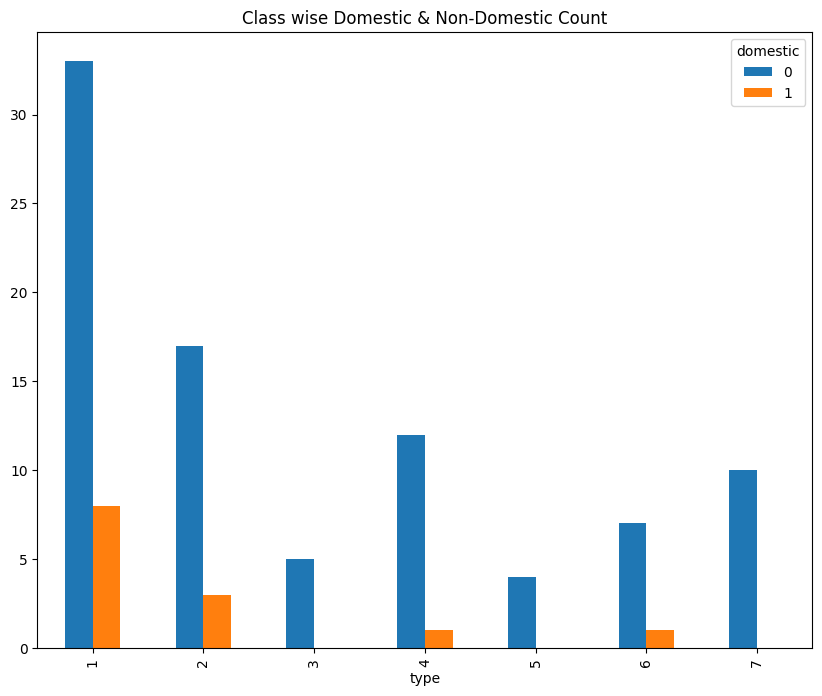

In [18]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [19]:
# Lets see how many animals provides us milk
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [20]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [21]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


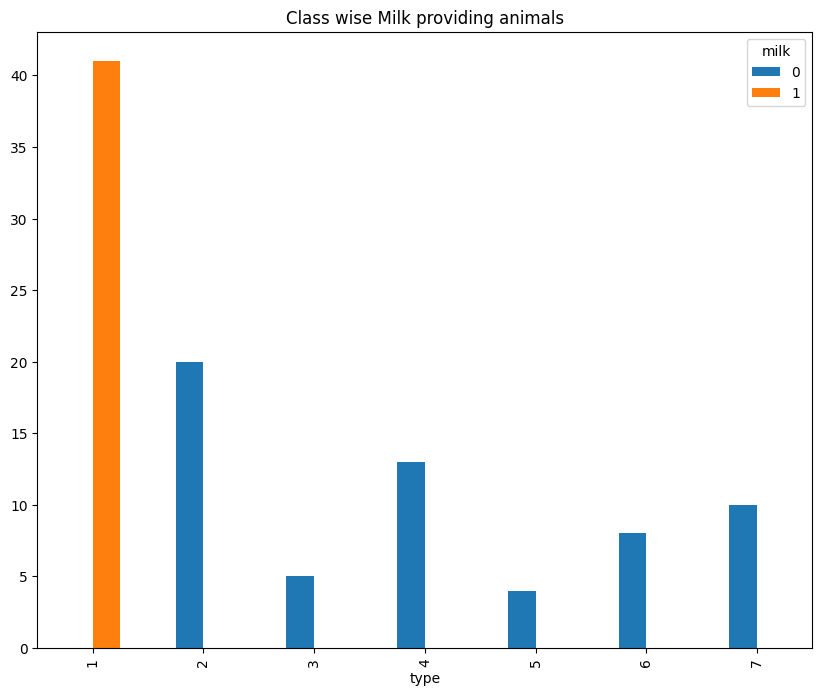

In [22]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [23]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
zoo.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [24]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

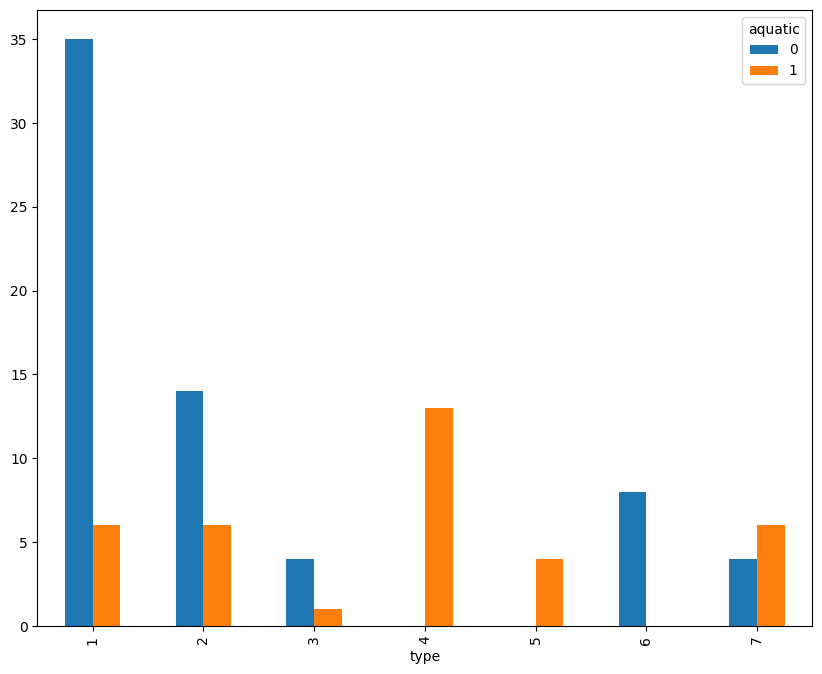

In [25]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [26]:
# finding Unique value of class_type
type_list = [i for i in zoo.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

<Axes: >

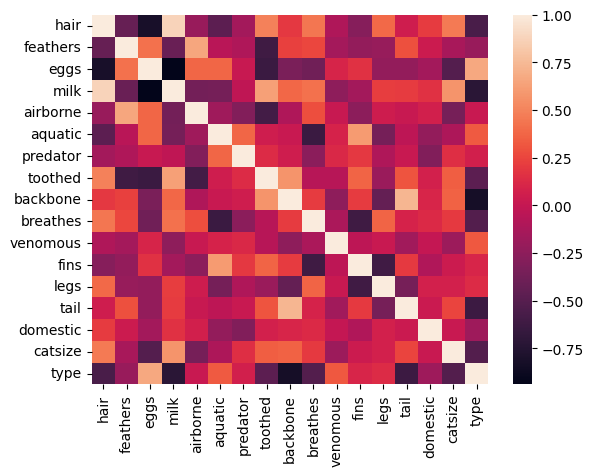

In [32]:
cor = zoo.corr()
sns.heatmap(cor)

R^2 Score:  0.6681125904754137


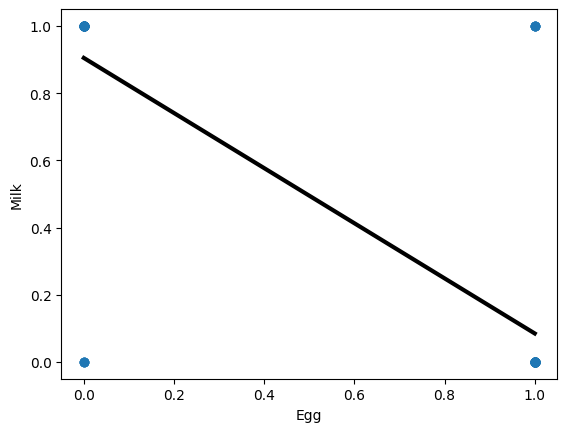

In [40]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
regression.fit(x,y)
predicted = regression.predict(predict_space)

print("R^2 Score: ",regression.score(x,y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Milk')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
k=5
cv_result = cross_val_score(regression,x,y,cv=k)
print("CV Scores: ",cv_result)
print("CV Average: ",np.sum(cv_result)/k)

CV Scores:  [0.80171562 0.61914032 0.79243817 0.24939434 0.76176534]
CV Average:  0.6448907578047475


In [48]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1 )
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confisuon Matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred))

Confisuon Matrix: 
 [[15  0]
 [ 0 16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



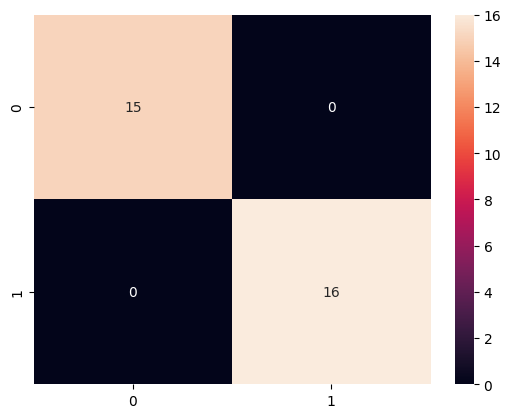

In [52]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

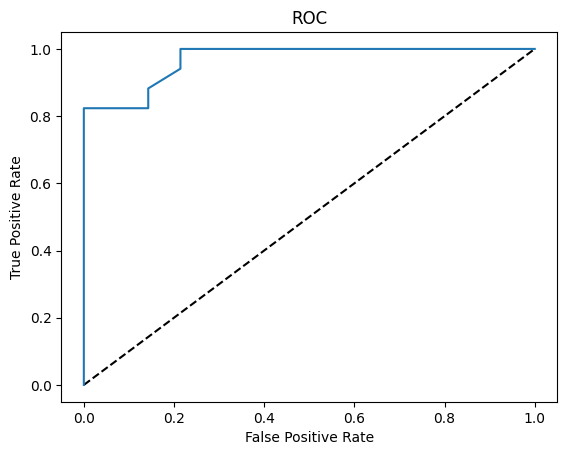

In [53]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#hair = 1 no = 0
x,y = zoo.loc[:,(zoo.columns != 'hair')], zoo.loc[:,'hair']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


In [33]:
zoo.drop("animal name",axis=1,inplace=True)

In [34]:
color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in zoo.hair]

In [35]:
unique_list = list(set(color_list))
unique_list

['blue', 'red']

In [54]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.9402852049910874


In [55]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.9299516908212562


In [56]:
df = pd.get_dummies(zoo)
df.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9523809523809523
Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


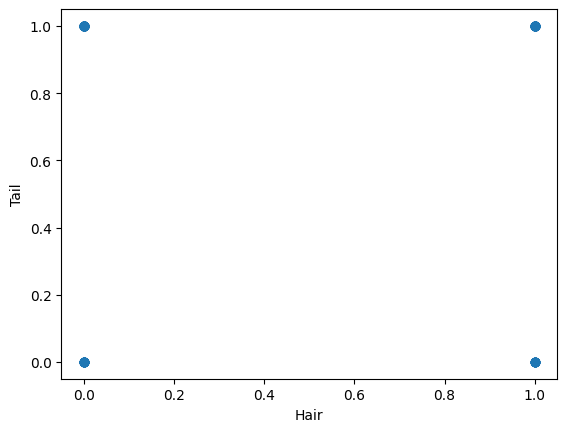

In [58]:
plt.scatter(zoo['hair'],zoo['tail'])
plt.xlabel('Hair')
plt.ylabel('Tail')
plt.show()

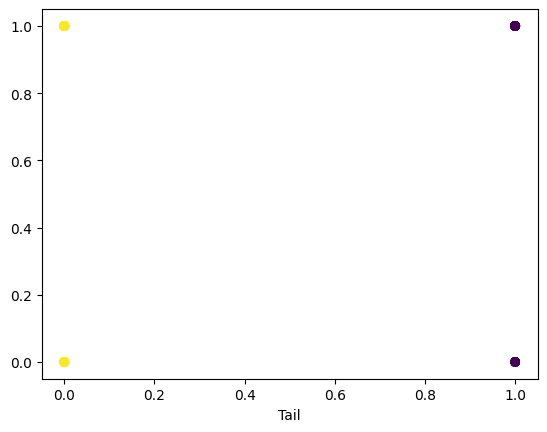

In [59]:
data2 = zoo.loc[:,['tail','hair']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(zoo['hair'],zoo['tail'],c = labels)
plt.xlabel('Hair')
plt.xlabel('Tail')
plt.show()

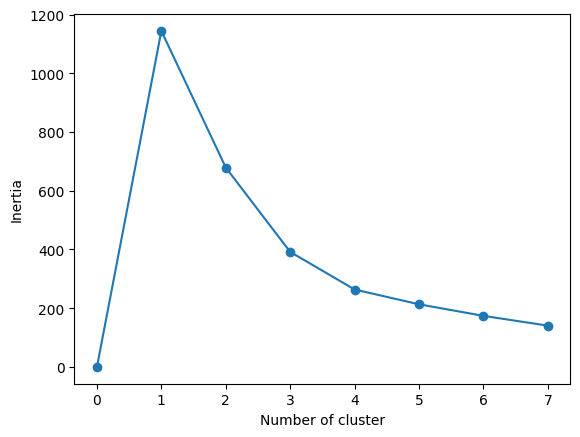

In [61]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(zoo)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [60]:
df = pd.DataFrame({'labels':labels,"hair":zoo['hair']})
ct = pd.crosstab(df['labels'],df['hair'])
print(ct)

hair     0   1
labels        
0        0  43
1       58   0


In [62]:
data2 = zoo.drop("hair",axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data2)
labels = pipe.predict(data2)
df = pd.DataFrame({'labels':labels,"hair":zoo['hair']})
ct = pd.crosstab(df['labels'],df['hair'])
print(ct)

hair     0   1
labels        
0       56   4
1        2  39


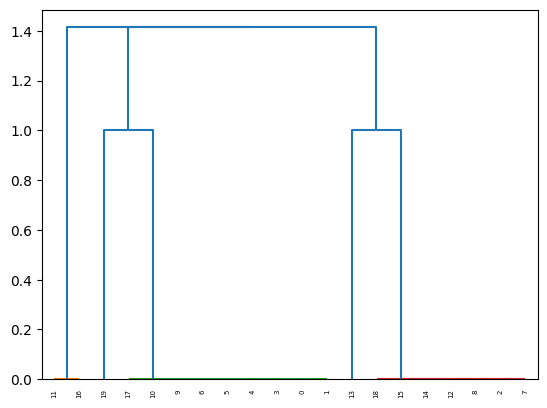

In [64]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data2.iloc[:20,0:5],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 5)
plt.show()

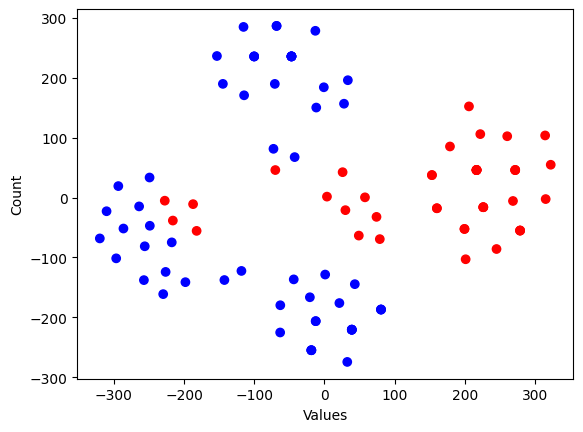

In [65]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100,random_state=42)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

In [66]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data2[0:4])
transformed = model.transform(data2[0:4])
print('Principle components: ',model.components_)

Principle components:  [[ 1.46970353e-16  1.77997984e-01 -1.77997984e-01  0.00000000e+00
   1.77997984e-01  5.75617345e-02  0.00000000e+00  0.00000000e+00
  -1.77997984e-01  0.00000000e+00  1.77997984e-01 -7.11991938e-01
   1.20436250e-01  0.00000000e+00 -1.77997984e-01  5.33993953e-01]
 [-4.48155149e-16 -7.92144437e-03  7.92144437e-03 -0.00000000e+00
  -7.92144437e-03 -7.10368323e-01 -0.00000000e+00 -0.00000000e+00
   7.92144437e-03 -0.00000000e+00 -7.92144437e-03  3.16857775e-02
   7.02446879e-01 -0.00000000e+00  7.92144437e-03 -2.37643331e-02]
 [ 8.85030463e-01  4.08050478e-01 -1.14058514e-02 -0.00000000e+00
   1.14058514e-02  5.70292570e-03 -0.00000000e+00 -0.00000000e+00
  -1.14058514e-02 -0.00000000e+00  1.14058514e-02 -4.56234056e-02
   5.70292570e-03 -0.00000000e+00 -1.14058514e-02 -2.17758761e-01]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 

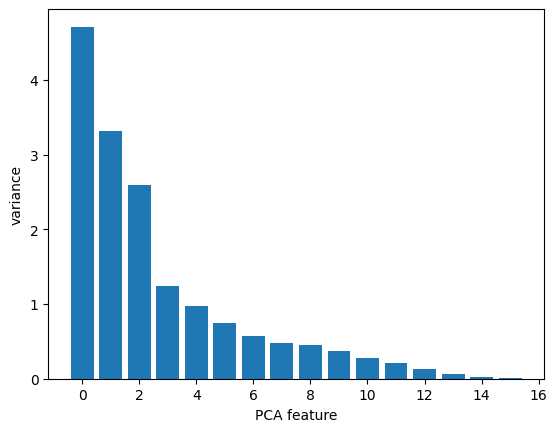

In [67]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data2)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

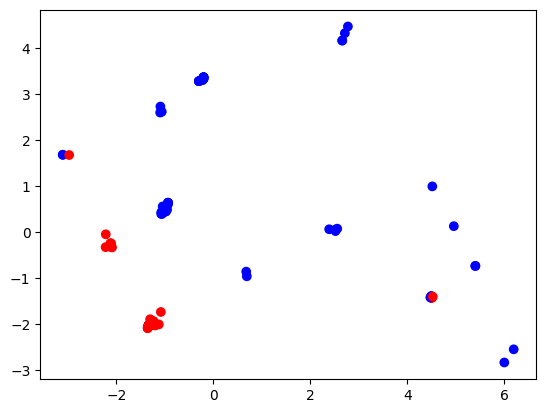

In [68]:
pca = PCA(n_components = 2)
pca.fit(data2)
transformed = pca.transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()

In [70]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [71]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
X_train

In [72]:
X_test

,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
19,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
89,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
2,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
43,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
93,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
85,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
76,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0
96,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
18,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [73]:
Y_train

37    2
81    7
98    1
56    2
60    4
     ..
94    1
72    7
26    5
75    1
83    2
Name: type, Length: 70, dtype: int64

In [74]:
Y_test

19    1
1     1
89    5
2     4
43    2
93    1
85    7
76    3
96    1
18    4
27    1
32    1
28    1
13    7
35    1
51    6
78    2
42    6
15    7
6     1
29    1
17    1
62    3
8     4
10    1
71    2
79    2
41    2
0     1
73    4
57    2
Name: type, dtype: int64

In [75]:
num_folds = 10
kfold = KFold(n_splits=10)

In [76]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    11
2     8
4     6
6     3
7     2
5     1
dtype: int64

In [78]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,4,5,6,7
type,,,,,,
1,11,2,0,0,0,0
2,0,6,0,0,0,0
3,0,0,2,0,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,2,0
7,0,0,0,0,1,2


In [79]:
# Accuracy
np.mean(preds==Y_test)

0.8387096774193549

In [80]:
model.score(X_train,Y_train)

0.9285714285714286

In [81]:
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 83.87096774193549


In [83]:
results = cross_val_score(model, X, Y, cv=kfold)

In [84]:
print(results.mean()*100)

94.0


In [85]:
print(results.std()*100)

9.165151389911681


# Grid Search for Algorithm Tuning

In [86]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [87]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [88]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}
